In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [38]:
def function_tranformer(function):
    trf=ColumnTransformer([('func',FunctionTransformer(function),['Fare'])],remainder='passthrough')
    x_transformed=trf.fit_transform(x)
    
    alg=LogisticRegression()
    
    print ('Accuracy of the model after transformation is ',np.mean(cross_val_score(alg,x_transformed,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(15,5))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist="norm", plot=plt)
    plt.title('Q-Q Plot of Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_transformed[:,0], dist="norm", plot=plt)
    plt.title('Q-Q Plot of Fare After Transform')

    plt.show()

Accuracy of the model after transformation is  0.6712609238451936


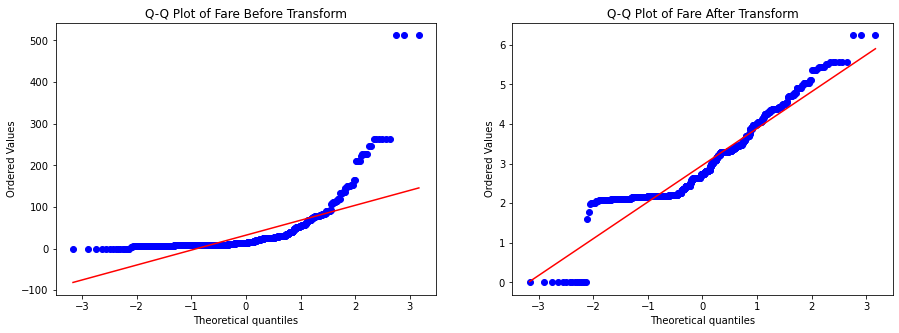

In [39]:
function_tranformer(np.log1p)

Accuracy of the model after transformation is  0.6611485642946316


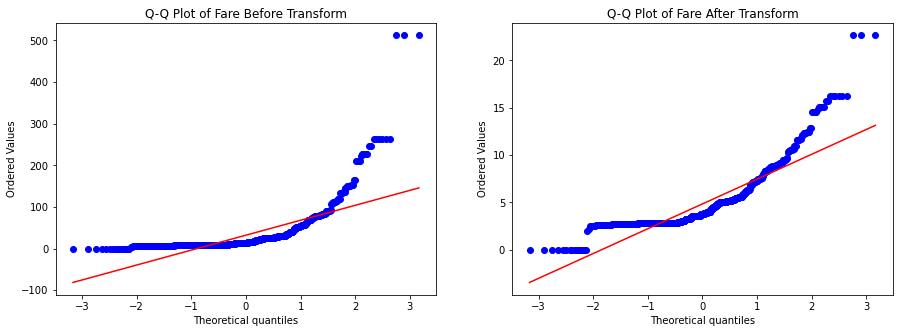

In [40]:
function_tranformer(np.sqrt)

Accuracy of the model after transformation is  0.6195131086142323


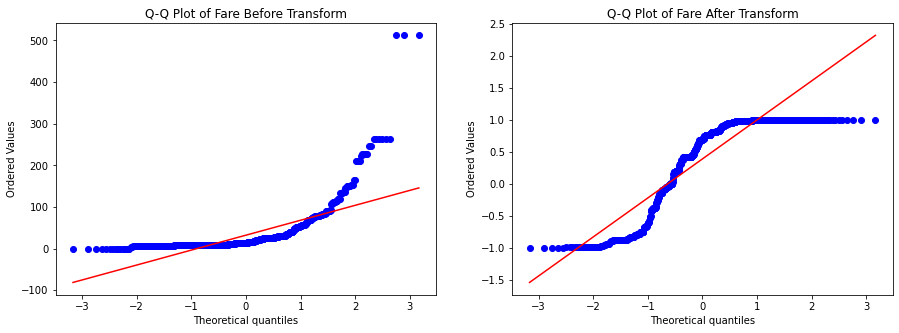

In [43]:
function_tranformer(np.sin)